# Importing Libraries

In [49]:
import pandas as pd
import spacy

## Data Preprocessing

In [50]:
df=pd.read_csv('/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv')

In [51]:
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


### Removing unwanted columns

In [52]:
df.drop(columns=['2401'], inplace=True)

In [53]:
df.head()

,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,Borderlands,Positive,I am coming to the borders and I will kill you...
1,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,Borderlands,Positive,im coming on borderlands and i will murder you...
3,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,Borderlands,Positive,im getting into borderlands and i can murder y...


### Renaming columns

In [54]:
df.rename(columns={
    'Borderlands':'Game_Name',
    'Positive':'Sentiment',
    'im getting on borderlands and i will murder you all ,':'tweet'
}, inplace=True)

In [55]:
df.head()

,Game_Name,Sentiment,tweet
0,Borderlands,Positive,I am coming to the borders and I will kill you...
1,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,Borderlands,Positive,im coming on borderlands and i will murder you...
3,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,Borderlands,Positive,im getting into borderlands and i can murder y...


----------------

### Handling Missing values

In [56]:
df.isnull().sum()

Game_Name      0
Sentiment      0
tweet        686
dtype: int64

In [57]:
df.shape

(74681, 3)

#### Removing null values

In [58]:
df=df.dropna()

In [59]:
df.isnull().sum()

Game_Name    0
Sentiment    0
tweet        0
dtype: int64

--------------

## Creating a new dataset from Original Dataset

In [60]:
df.Sentiment.value_counts()

Sentiment
Negative      22358
Positive      20654
Neutral       18108
Irrelevant    12875
Name: count, dtype: int64

In [61]:
df_positive= df[df.Sentiment =='Positive'].iloc[:2000]
df_negative= df[df.Sentiment  =='Negative'].iloc[:2000]
df_neutral= df[df.Sentiment =='Neutral'].iloc[:2000]
df_irr= df[df.Sentiment =='Irrelevant'].iloc[:2000]

In [62]:
df2=pd.concat([df_positive,df_negative,df_neutral,df_irr ], axis=0)

In [63]:
df2.shape

(8000, 3)

In [66]:
df2.Sentiment.value_counts()

Sentiment
Positive      2000
Negative      2000
Neutral       2000
Irrelevant    2000
Name: count, dtype: int64

--------------

## Categorical to Numerical Data Transformation

In [67]:
df2.Game_Name.unique()

array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)'], dtype=object)

In [70]:
game_df=(pd.get_dummies(df2['Game_Name'])).astype('int')

In [71]:
game_df

,Amazon,Borderlands,CallOfDutyBlackopsColdWar,Overwatch,Xbox(Xseries)
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0
...,...,...,...,...,...
10628,0,0,0,0,1
10629,0,0,0,0,1
10630,0,0,0,0,1
10631,0,0,0,0,1


In [72]:
df2.drop(columns=['Game_Name'], inplace=True)

In [73]:
df2.head()

,Sentiment,tweet
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...


In [76]:
df2.shape, game_df.shape

((8000, 2), (8000, 5))

------------

# Text Preprocessing

In [78]:
nlp=spacy.load('en_core_web_sm')

### 1) Performing Lemmatization

In [79]:
def lemmatization(text):
    
    doc=nlp(text)

    lemma_list=[word.lemma_ for word in doc]
    
    return ' '.join(lemma_list)

In [80]:
df2['lemma']=df2['tweet'].apply(lemmatization)

In [81]:
df2.head(2)

,Sentiment,tweet,lemma
0,Positive,I am coming to the borders and I will kill you...,"I be come to the border and I will kill you all ,"
1,Positive,im getting on borderlands and i will kill you ...,"I m get on borderland and I will kill you all ,"


### 2) Removing Stopwords

In [82]:
def remove_stopwords(text):
    
    doc=nlp(text)

    no_stopwords= [word.text for word in doc if not word.is_stop and not word.is_punct]

    return ' '.join(no_stopwords)

In [83]:
df2['final']=df2['lemma'].apply(remove_stopwords)

In [85]:
df2.head(2)

,Sentiment,tweet,lemma,final
0,Positive,I am coming to the borders and I will kill you...,"I be come to the border and I will kill you all ,",come border kill
1,Positive,im getting on borderlands and i will kill you ...,"I m get on borderland and I will kill you all ,",m borderland kill


----------

### Removing unwanted columns

In [86]:
df2.drop(columns=['tweet', 'lemma'], inplace=True)

In [87]:
df2.head()

,Sentiment,final
0,Positive,come border kill
1,Positive,m borderland kill
2,Positive,m come borderland murder
3,Positive,m borderland 2 murder
4,Positive,m borderland murder


In [88]:
sentiment_df=pd.concat([df2, game_df], axis=1)

In [90]:
sentiment_df.head()

,Sentiment,final,Amazon,Borderlands,CallOfDutyBlackopsColdWar,Overwatch,Xbox(Xseries)
0,Positive,come border kill,0,1,0,0,0
1,Positive,m borderland kill,0,1,0,0,0
2,Positive,m come borderland murder,0,1,0,0,0
3,Positive,m borderland 2 murder,0,1,0,0,0
4,Positive,m borderland murder,0,1,0,0,0


In [91]:
sentiment_df.shape

(8000, 7)

In [92]:
sentiment_df.isnull().sum()

Sentiment                    0
final                        0
Amazon                       0
Borderlands                  0
CallOfDutyBlackopsColdWar    0
Overwatch                    0
Xbox(Xseries)                0
dtype: int64

------------

## Dividing the Dataset 

In [94]:
X=sentiment_df.drop(columns=['Sentiment'])
Y=sentiment_df['Sentiment']

In [95]:
X.head()

,final,Amazon,Borderlands,CallOfDutyBlackopsColdWar,Overwatch,Xbox(Xseries)
0,come border kill,0,1,0,0,0
1,m borderland kill,0,1,0,0,0
2,m come borderland murder,0,1,0,0,0
3,m borderland 2 murder,0,1,0,0,0
4,m borderland murder,0,1,0,0,0


------------

## Tfidf Vectorizer

In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [97]:
tfidf=TfidfVectorizer()

In [98]:
tfidf.fit(X['final'])

TfidfVectorizer()

In [101]:
tfidf_matrix=tfidf.transform(X['final']).toarray()

In [102]:
tfidf_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [103]:
vectorizer_df=pd.DataFrame(tfidf_matrix, columns=tfidf.get_feature_names_out())

In [104]:
vectorizer_df.head()

,00,000,01,02,03,03573057,0359873057,04,05,06,...,zxxxvids,zyfapoihpy,ееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееее,есть,июля,сетью,третьарце,اللعبه,حبيت,خلاص
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [105]:
X.drop(columns=['final'], inplace=True)

In [106]:
X.shape, vectorizer_df.shape

((8000, 5), (8000, 6720))

In [107]:
X=pd.concat([X, vectorizer_df], axis=1)

In [108]:
X.head()

,Amazon,Borderlands,CallOfDutyBlackopsColdWar,Overwatch,Xbox(Xseries),00,000,01,02,03,...,zxxxvids,zyfapoihpy,ееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееее,есть,июля,сетью,третьарце,اللعبه,حبيت,خلاص
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [109]:
X.isna().sum()

Amazon                       952
Borderlands                  952
CallOfDutyBlackopsColdWar    952
Overwatch                    952
Xbox(Xseries)                952
                            ... 
сетью                        952
третьарце                    952
اللعبه                       952
حبيت                         952
خلاص                         952
Length: 6725, dtype: int64

In [110]:
X=X.fillna(0)

In [112]:
X.isna().sum()

Amazon                       0
Borderlands                  0
CallOfDutyBlackopsColdWar    0
Overwatch                    0
Xbox(Xseries)                0
                            ..
сетью                        0
третьарце                    0
اللعبه                       0
حبيت                         0
خلاص                         0
Length: 6725, dtype: int64

--------------

## Train Test Split

In [113]:
from sklearn.model_selection import train_test_split

In [115]:
X=X.iloc[:8000]

In [116]:
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size=0.2, random_state=42)

In [117]:
X.shape, X_train.shape, X_test.shape

((8000, 6725), (6400, 6725), (1600, 6725))

----------

# Building Our Model

In [118]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

## Model Training

In [119]:
model=RandomForestClassifier(n_jobs=1,
                            random_state=42,
                            n_estimators=200)

model.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=200, n_jobs=1, random_state=42)

-------------

## Model Evaluation

In [120]:
pred=model.predict(X_test)

### i) Accuracy Score

In [121]:
accuracy_score(Y_test, pred)

0.71

### ii) Classification Report

In [124]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

  Irrelevant       0.73      0.73      0.73       399
    Negative       0.73      0.59      0.65       379
     Neutral       0.70      0.74      0.72       397
    Positive       0.69      0.78      0.73       425

    accuracy                           0.71      1600
   macro avg       0.71      0.71      0.71      1600
weighted avg       0.71      0.71      0.71      1600



### iii) Confusion Matrix 

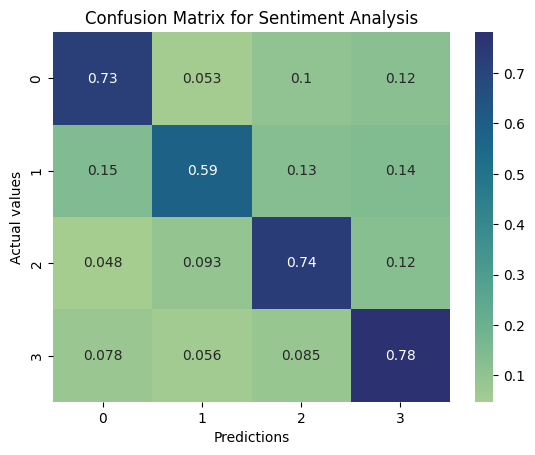

In [129]:
import seaborn as sn
import matplotlib.pyplot as plt

cf=confusion_matrix(Y_test, pred,normalize='true')

sn.heatmap(cf, annot=True, cmap='crest');

plt.xlabel('Predictions')
plt.ylabel('Actual values')
plt.title("Confusion Matrix for Sentiment Analysis")

plt.show()

-------------